## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 10.8: superbubbles in atomic gas

#### uses fits file downloaded from HI4PI vizier (http://cdsarc.u-strasbg.fr/viz-bin/qcat?J/A+A/594/A116)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

In [7]:
# download 256 Mbyte file which is too big to be allowed in the github repo
# this could take a few minutes
# (unfortunately the progress bar does not show in the notebook)
from astropy.utils.data import download_file
fitsfile = download_file('http://cdsarc.u-strasbg.fr/ftp/J/A+A/594/A116/CUBES/GAL/CAR/CAR_E14.fits', show_progress=True, cache=True)
hdu = fits.open(fitsfile)
print('--> downloaded')

--> downloaded


In [4]:
# read in data if you have it in your directory
# (commented out for the interstellarmedium.github.io version)
#hdu = fits.open('CAR_E14.fits')

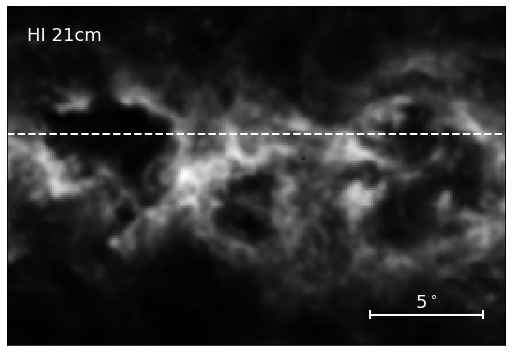

In [8]:
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(111)
im = hdu[0].data
hd = hdu[0].header
hdu.close()

i = 1 + np.arange(hd['NAXIS1'])
lon = hd['CRVAL1'] + (i - hd['CRPIX1']) * hd['CDELT1']
j = 1 + np.arange(hd['NAXIS2'])
lat = hd['CRVAL2'] + (i - hd['CRPIX2']) * hd['CDELT2']
k = 1 + np.arange(hd['NAXIS3'])
v = hd['CRVAL3'] + (k - hd['CRPIX3']) * hd['CDELT3']
v /= 1000

imin, imax = 0, hd['NAXIS1']-1
xmin = lon[imin]
xmax = lon[imax]
#print(xmin, xmax)

jmin, jmax = 0, hd['NAXIS2']-1
jmin, jmax = 20, 200
ymin = lat[jmin]
ymax = lat[jmax]
#print(ymin, ymax)

kmin, kmax = 501, 501
#print(v[kmin], v[kmax])

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
im_section = np.sum(im[kmin:kmax+1, jmin:jmax+1, imin:imax+1], axis=0)
#print(im_int.min(), im_int.max())
ax1.imshow(im_section, cmap='gray', origin='lower', extent=[xmin, xmax, ymin, ymax])
ax1.tick_params(axis='both', which='both', length=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)

# plot galactic plane
plt.plot([xmin,xmax], [0,0], ls='dashed', color='white', lw=2)

# scale bar
ax1.plot([xmax+1,xmax+6],[-8,-8], 'w-', lw=2)
ax1.plot([xmax+1,xmax+1],[-8.15,-7.85], 'w-', lw=2)
ax1.plot([xmax+6,xmax+6],[-8.15,-7.85], 'w-', lw=2)
#ax1.text(xmax+9, -7.7, r'$10^\circ$', color='white', fontsize=14, ha='center')
ax1.text(xmax+3.5, -7.7, r'$5^\circ$', color='white', fontsize=18, ha='center')
ax1.text(0.04,0.90,'HI 21cm', {'color': 'w', 'fontsize': 18}, transform=ax1.transAxes)

plt.tight_layout()
plt.savefig('HI_bubbles.pdf')